# Task 25

Regularization example


In [1]:
from tensorflow import keras
from keras import layers, regularizers
from keras.datasets import imdb
import matplotlib.pyplot as plt

In [2]:
# Load the IMDB dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
# Pad the sequences to be the same length
train_data = keras.preprocessing.sequence.pad_sequences(train_data, maxlen=10000)
test_data = keras.preprocessing.sequence.pad_sequences(test_data, maxlen=10000)

In [4]:
# Define the model with L2 regularization
model = keras.Sequential([
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(10000,)),
    layers.Dropout(0.5),
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])


In [5]:

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
# Train the model
history = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.2)


Epoch 1/20
40/40 [==============================] - 3s 41ms/step - loss: 16.2271 - accuracy: 0.5015 - val_loss: 0.7347 - val_accuracy: 0.5062
Epoch 2/20
40/40 [==============================] - 1s 36ms/step - loss: 0.7446 - accuracy: 0.4989 - val_loss: 0.7213 - val_accuracy: 0.5068
Epoch 3/20
40/40 [==============================] - 2s 39ms/step - loss: 0.7415 - accuracy: 0.4974 - val_loss: 0.7195 - val_accuracy: 0.4940
Epoch 4/20
40/40 [==============================] - 2s 44ms/step - loss: 0.7256 - accuracy: 0.5016 - val_loss: 0.7197 - val_accuracy: 0.4934
Epoch 5/20
40/40 [==============================] - 2s 49ms/step - loss: 0.7506 - accuracy: 0.5017 - val_loss: 0.7201 - val_accuracy: 0.4934
Epoch 6/20
40/40 [==============================] - 2s 38ms/step - loss: 0.7181 - accuracy: 0.5015 - val_loss: 0.7200 - val_accuracy: 0.4932
Epoch 7/20
40/40 [==============================] - 1s 37ms/step - loss: 0.7185 - accuracy: 0.5016 - val_loss: 0.7193 - val_accuracy: 0.4936
Epoch 8/20
4

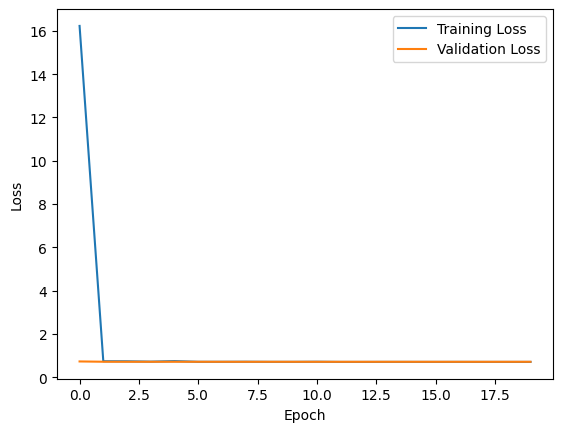

In [7]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()